In [5]:
import pandas as pd
import numpy as np

In [6]:
data = {"RollNo":[1,2,3,4,5,6,7,8,9],
        "Name":["om","rohan","akshay","bhushan","tejas","harsh","rohit","gg","hi"],
        "AI":[34,45,67,23,np.nan,77,np.nan,56,120],
        "WT":[102,34,56,76,56,44,77,98,67],
        "DSBDA":[45,44,34,56,22,67,85,45,90],
        "CC":[45,77,66,88,99,22,33,11,23]
       }

In [7]:
dataset = pd.DataFrame(data)

In [8]:
dataset

,RollNo,Name,AI,WT,DSBDA,CC
0,1,om,34.0,102,45,45
1,2,rohan,45.0,34,44,77
2,3,akshay,67.0,56,34,66
3,4,bhushan,23.0,76,56,88
4,5,tejas,NaN,56,22,99
5,6,harsh,77.0,44,67,22
6,7,rohit,NaN,77,85,33
7,8,gg,56.0,98,45,11
8,9,hi,120.0,67,90,23


In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RollNo  9 non-null      int64  
 1   Name    9 non-null      object 
 2   AI      7 non-null      float64
 3   WT      9 non-null      int64  
 4   DSBDA   9 non-null      int64  
 5   CC      9 non-null      int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 564.0+ bytes


In [19]:
dataset.head()

,RollNo,Name,AI,WT,DSBDA,CC
0,1,om,34.0,102,45,45
1,2,rohan,45.0,34,44,77
2,3,akshay,67.0,56,34,66
3,4,bhushan,23.0,76,56,88
4,5,tejas,NaN,56,22,99


In [20]:
dataset.tail()

,RollNo,Name,AI,WT,DSBDA,CC
4,5,tejas,NaN,56,22,99
5,6,harsh,77.0,44,67,22
6,7,rohit,NaN,77,85,33
7,8,gg,56.0,98,45,11
8,9,hi,120.0,67,90,23


In [9]:
dataset.isnull()

,RollNo,Name,AI,WT,DSBDA,CC
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,True,False,False,False
5,False,False,False,False,False,False
6,False,False,True,False,False,False
7,False,False,False,False,False,False
8,False,False,False,False,False,False


In [10]:
dataset.isnull().any()

RollNo    False
Name      False
AI         True
WT        False
DSBDA     False
CC        False
dtype: bool

In [11]:
dataset.isnull().sum()

RollNo    0
Name      0
AI        2
WT        0
DSBDA     0
CC        0
dtype: int64

In [12]:
dataset.AI.isnull().sum()

2

In [15]:
cols_with_na = []
for col in dataset.columns:
    if dataset[col].isna().any():
        cols_with_na.append(col)

cols_with_na

['AI']

In [16]:
dataset.replace(np.nan,value=0)

,RollNo,Name,AI,WT,DSBDA,CC
0,1,om,34.0,102,45,45
1,2,rohan,45.0,34,44,77
2,3,akshay,67.0,56,34,66
3,4,bhushan,23.0,76,56,88
4,5,tejas,0.0,56,22,99
5,6,harsh,77.0,44,67,22
6,7,rohit,0.0,77,85,33
7,8,gg,56.0,98,45,11
8,9,hi,120.0,67,90,23


In [17]:
dataset.fillna(1)

,RollNo,Name,AI,WT,DSBDA,CC
0,1,om,34.0,102,45,45
1,2,rohan,45.0,34,44,77
2,3,akshay,67.0,56,34,66
3,4,bhushan,23.0,76,56,88
4,5,tejas,1.0,56,22,99
5,6,harsh,77.0,44,67,22
6,7,rohit,1.0,77,85,33
7,8,gg,56.0,98,45,11
8,9,hi,120.0,67,90,23


In [18]:
dataset['AI']= dataset['AI'].fillna(dataset['AI'].mean())

In [19]:
dataset

,RollNo,Name,AI,WT,DSBDA,CC
0,1,om,34.000000,102,45,45
1,2,rohan,45.000000,34,44,77
2,3,akshay,67.000000,56,34,66
3,4,bhushan,23.000000,76,56,88
4,5,tejas,60.285714,56,22,99
5,6,harsh,77.000000,44,67,22
6,7,rohit,60.285714,77,85,33
7,8,gg,56.000000,98,45,11
8,9,hi,120.000000,67,90,23


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

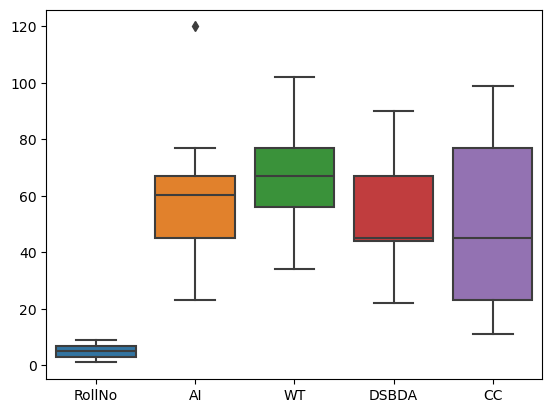

In [21]:
sns.boxplot(dataset)

<Axes: >

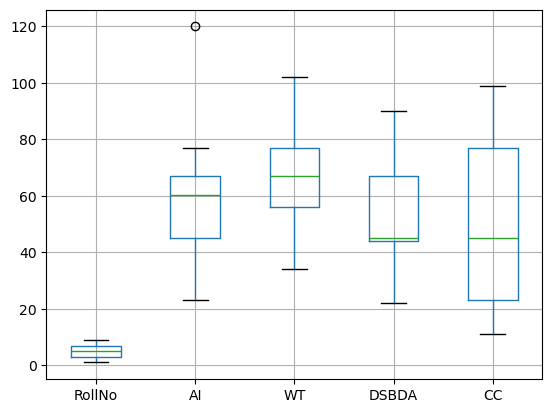

In [23]:
dataset.boxplot()

<Axes: xlabel='AI'>

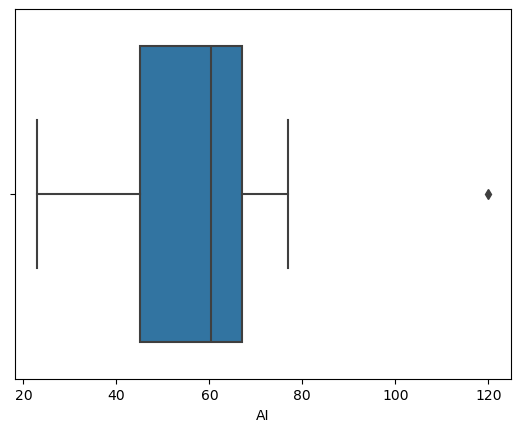

In [24]:
sns.boxplot(x=dataset.AI)

<Axes: xlabel='WT'>

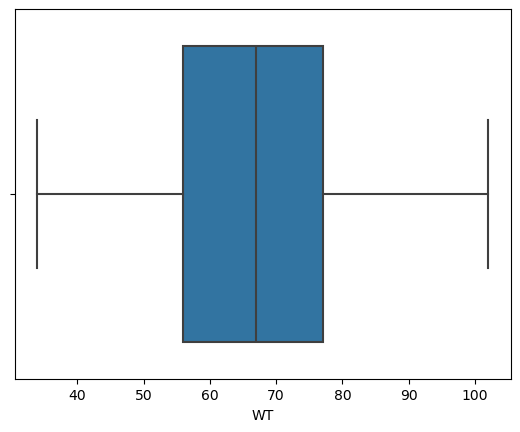

In [26]:
sns.boxplot(x=dataset.WT)

IndexError: list index out of range

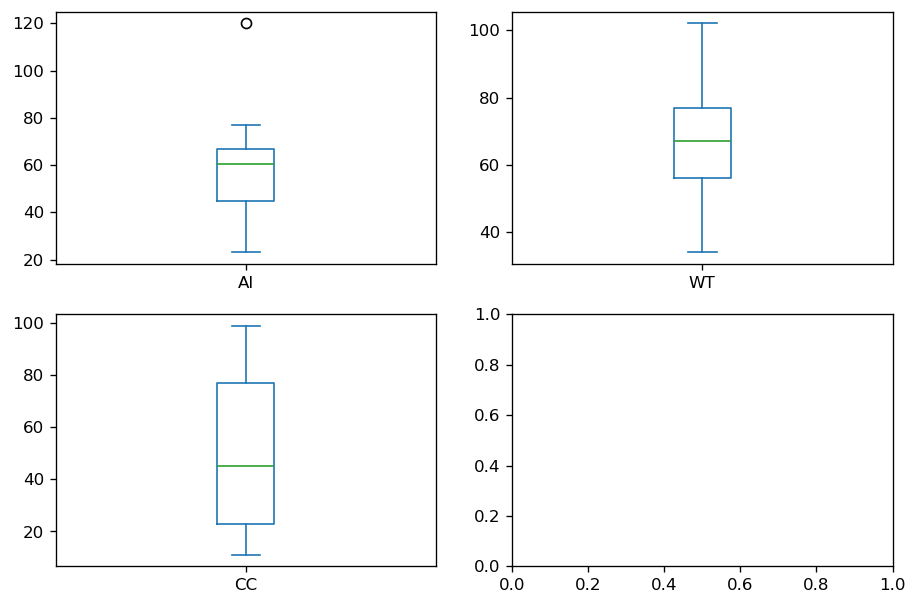

In [28]:
plt.rcParams["figure.figsize"] = (9,6)
dataset_list = ['AI','WT','CC']
fig, axes = plt.subplots(2,2)
fig.set_dpi(120)

count=0
for r in range(2):
    for c in range(2):
        _ = dataset[dataset_list[count]].plot(kind = 'box', ax=axes[r,c])
        count+=1

In [29]:
A1 = dataset['AI'].quantile(0.25)
A3 = dataset['AI'].quantile(0.75)
IQR = A3-A1

Lower_limit = A1 - 1.5 * IQR
Upper_limit = A3 + 1.5 * IQR

print(f'A1 = {A1}, A3 = {A3}, IQR = {IQR}, Lower_limit = {Lower_limit}, Upper_limit={Upper_limit}')

A1 = 45.0, A3 = 67.0, IQR = 22.0, Lower_limit = 12.0, Upper_limit=100.0


In [30]:
dataset[(dataset['AI'] < Lower_limit) | (dataset['AI'] > Upper_limit)]

,RollNo,Name,AI,WT,DSBDA,CC
8,9,hi,120.0,67,90,23


In [32]:
outliers = []
for i in dataset.AI:
    if i<Lower_limit or i>Upper_limit:
        outliers.append(i)

print("outlier are", outliers)

outlier are [120.0]


In [33]:
Lower_limit

12.0

In [34]:
Upper_limit

100.0

In [35]:
dataset[(dataset['AI'] < Lower_limit) | (dataset['AI'] > Upper_limit)].index

Index([8], dtype='int64')

In [36]:
df1 = dataset.drop(dataset[dataset.AI>Upper_limit].index)

In [37]:
df1.shape

(8, 6)

In [38]:
df1

,RollNo,Name,AI,WT,DSBDA,CC
0,1,om,34.000000,102,45,45
1,2,rohan,45.000000,34,44,77
2,3,akshay,67.000000,56,34,66
3,4,bhushan,23.000000,76,56,88
4,5,tejas,60.285714,56,22,99
5,6,harsh,77.000000,44,67,22
6,7,rohit,60.285714,77,85,33
7,8,gg,56.000000,98,45,11


In [40]:
df1.to_csv('academic_performance_clean.csv', index=False,encoding='utf-8')